In [32]:
#################################################################################
# Contributors - Breandán Kerin, Sinead Dickson, Alanna O'Grady, Daniel Lavelle #
#               Artificial Intelligence Assignment 2                            #
#################################################################################

import sys
import time
import matplotlib.pyplot as plt
from copy import deepcopy
import random
import matplotlib.pyplot as plt
from matplotlib import rcParams
import numpy as np
import pandas as pd

num_checks = 0


def print_board(board, n):
    for i in range(n):
        for j in range(n):
            print(board[i][j], end='')
        print()  # to get new line for board


def consistency_check_backtrack(board, row, col, n):
    # check for other queen in same row
    global num_checks
    num_checks += 1

    for i in range(col):
        num_checks += 1
        if board[row][i] == 1:
            return False

    for i, j in zip(range(row, -1, -1), range(col, -1, -1)):
        num_checks += 1
        if board[i][j] == 1:
            return False

        # Check lower diagonal on left side
    for i, j in zip(range(row, n, 1), range(col, -1, -1)):
        num_checks += 1
        if board[i][j] == 1:
            return False

    return True


#
# Goal - add a queen to any square in the leftmost column such that it is not attacked by any other queen
#
def back_tracking(board, col, n):
    # finished - all queens have been added in safe place
    if col == n:
        return True

    # not finished - try placing queen in each row in leftmost column
    for row in range(n):

        if consistency_check_backtrack(board, row, col, n):
            # is safe move - add
            board[row][col] = 1
            # printSolution(board, N)

            # place other queens to see if this position is safe
            if back_tracking(board, col + 1, n):
                return True

            # doesn't lead to solution - backtrack, remove queen from cell
            board[row][col] = 0

    # if the queen can not be placed in any row in
    # this column col  then return false
    return False


# A Optimized function to check if a queen can  be placed on board[row][col]
def is_safe_bnb(row, col, forward_slash_helper, back_slash_helper, row_lookup_helper, forward_slash_lookup_helper, back_slash_lookup_helper):
    val1 = forward_slash_helper[row][col]
    val2 = back_slash_helper[row][col]

    global num_checks
    num_checks += 1

    if forward_slash_lookup_helper[val1] or back_slash_lookup_helper[val2] or row_lookup_helper[row]:
        return False
    return True


# A recursive utility function to solve N Queen problem
def bnb_solve_n_q(board, col, forward_slash_helper, back_slash_helper, row_lookup_helper, forward_slash_lookup_helper, back_slash_lookup_helper, n):
    # base case: If all queens are placed then return true
    if col >= n:
        return True

    # Consider this column and try placing this queen in all rows one by one
    for i in range(n):
        # Check if queen can be placed on board[i][col]
        if is_safe_bnb(i, col, forward_slash_helper, back_slash_helper, row_lookup_helper,
                       forward_slash_lookup_helper, back_slash_lookup_helper):

            # Place this queen in board[i][col]
            board[i][col] = 1
            row_lookup_helper[i] = True
            val1 = forward_slash_helper[i][col]
            val2 = back_slash_helper[i][col]
            forward_slash_lookup_helper[val1] = True
            back_slash_lookup_helper[val2] = True

            # recur to place rest of the queens
            if bnb_solve_n_q(board, col + 1, forward_slash_helper, back_slash_helper, row_lookup_helper,
                             forward_slash_lookup_helper, back_slash_lookup_helper, n):
                return True

            # If placing queen in board[i][col] doesn't lead to a solution, then backtrack
            # Remove queen from board[i][col]
            board[i][col] = 0
            row_lookup_helper[i] = False
            val1 = forward_slash_helper[i][col]
            val2 = back_slash_helper[i][col]
            forward_slash_lookup_helper[val1] = False
            back_slash_lookup_helper[val2] = False

    # If queen can not be place in any row in this column col then return false
    return False


def n_queens_branch_and_bound(n):
    print("Branch and Bound")
    board = create_board(n)

    # helper matrices
    forward_slash_helper = create_board(n)
    back_slash_helper = create_board(n)

    # arrays to tell us which rows are occupied
    row_helper = [False] * n

    # keep two arrays to tell us which diagonals are occupied
    forward_slash_lookup_helper = [False] * (2 * n - 1)
    back_slash_lookup_helper = [False] * (2 * n - 1)

    # initialise helper matrices
    for r in range(n):
        for c in range(n):
            forward_slash_helper[r][c] = r + c
            back_slash_helper[r][c] = r - c + (n - 1)

    if not bnb_solve_n_q(board, 0, forward_slash_helper, back_slash_helper,
                         row_helper, forward_slash_lookup_helper, back_slash_lookup_helper, n):
        print("solution doesn't exist")
        return False
    print_board(board, n)
    return True


def create_board(num_queens):
    board = []
    for i in range(0, num_queens):
        board.append([0] * num_queens)
    return board


def n_queens_backtracking(number_queens):
    start = time.time()
    print("backtrack")
    board = create_board(number_queens)
    if not back_tracking(board, 0, number_queens):
        print("Solution does not exist")
        end = time.time()
        execution_time = end - start
        print(execution_time)
        return execution_time
    print_board(board, number_queens)
    end = time.time()
    execution_time = end - start
    print(execution_time)
    return execution_time

##~~~~~~~~~~~~~~~~ HILL CLIMBING ~~~~~~~~~~~~~~

def generate_random_board(n):
    """
    Returns a vector of positions where queen is for
    each column
    """
    q = []
    b = create_board(n)
    for col in range(n):  
        r = random.randint(0, n-1)
        q.append(r)
        b[r][col] = 1
    return b, q
def do_avoid_eachother(i, j, q):
    """
    Assumes i != j, and j > i
    """
    global num_checks
    num_checks+=1
    if q[i] == q[j]:
        return 0
    elif abs(j-i) == abs(q[j] - q[i]):
        return 0
    else:
        
        return 1
def objective_function(q):
    """
    Measure how many pairs of queens do not get in each other's way
    param: board a 2 d list indicating where queens are
    param: q : a list indictating where the queens for each column are
    n: n for n queens
    """
    result = 0
    n = len(q)
    for i in range(n):
        for j in range(i+1, n):
            # check if queen i and j are giving each other grief
            avoid_eachother = do_avoid_eachother(i,j,q)
            result += avoid_eachother
            
    return result



def compute_optimum_avoiding_pairs(n):
    """
    Compute the optimum number of queens
    that could avoid each other for n queens
    problem, given by sigma(n)
    """
    count = 0
    for i in range(n):
        count+=i
    return count

def hill_climbing_algorithm(starting_q):
    """
    Compute hill climbing algorithm for input
    list of queen positions
    """
    start = time.time()
    n = len(starting_q)
    optimum = compute_optimum_avoiding_pairs(n)
    best_score = objective_function(starting_q) 
    q = starting_q
    while(best_score < optimum):
        better_score_found = False
        for i in range(n):
            # Cycle through all queens
            temp_q = deepcopy(q)
            for j in range(n):
                if j != q[i]:
                    temp_q[i] = j
                    score = objective_function(temp_q)
                    if score > best_score:
                        q = temp_q
                        best_score = score
                        better_score_found = True
                        break
                
                
        if not better_score_found:
            q = randomise_board(q)
            best_score = objective_function(q)
    end = time.time()
    ##print("Hill Climbing board results:") 
    ##print_board_q(q)
    return end-start

def randomise_board(q):
    """
    Randomise board given input is a list of
    queen positions
    """
    n = len(q)
    for i in range(n):
        q[i] = random.randint(0, n-1)
    return q
def print_board_q(q):
    """
    Print function specific to the list data structure used in 
    hill climbing
    """
    n = len(q)
    b = create_board(n)
    for i in range(n):
        b[q[i]][i] = 1
    print_board(b, n)
##~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


In [3]:

backtracking_execution_times = []
backtracking_num_checks = []
bnb_execution_times = []
bnb_num_checks = []
hill_climbing_execution_times = []
hill_climbing_num_checks = []
queens_test_range = range(4, 24, 4)
HILL_CLIMBING_SAMPLE_SIZE = 20 ## In order to account for randomisation
# backtracking

In [4]:
hc_temp_times = {}
hc_temp_checks = {}
for i in queens_test_range:
    ##hill climbing
    hc_temp_times[i] = []
    hc_temp_checks[i] = []
    for _ in range(HILL_CLIMBING_SAMPLE_SIZE):
        _, q = generate_random_board(i)
        t = hill_climbing_algorithm(q)
        hc_temp_times[i].append(t)
        hc_temp_checks[i].append(num_checks)
        num_checks = 0
    hill_climbing_execution_times.append(np.median(hc_temp_times[i]))
    hill_climbing_num_checks.append(np.median(hc_temp_checks[i]))
    print("Hill Climbing Time Taken: %s" % (np.median(hc_temp_times[i])))
    print("Number of checks in Hill Climbing: " + str(np.median(hc_temp_checks[i])))

Hill Climbing Time Taken: 0.0002595186233520508
Number of checks in Hill Climbing: 270.0
Hill Climbing Time Taken: 0.006652355194091797
Number of checks in Hill Climbing: 11410.0
Hill Climbing Time Taken: 0.21804845333099365
Number of checks in Hill Climbing: 378279.0
Hill Climbing Time Taken: 1.6898529529571533
Number of checks in Hill Climbing: 3321300.0
Hill Climbing Time Taken: 2.823124408721924
Number of checks in Hill Climbing: 5718525.0


In [5]:
bnb_temp_times = {}
bnb_temp_checks = {}
for i in queens_test_range:
    ##hill climbing
    bnb_temp_times[i] = []
    bnb_temp_checks[i] = []
    for _ in range(HILL_CLIMBING_SAMPLE_SIZE):
        start = time.time()
        n_queens_branch_and_bound(i)
        t = time.time() - start
        bnb_temp_times[i].append(t)
        bnb_temp_checks[i].append(num_checks)
        num_checks = 0
    bnb_execution_times.append(np.median(bnb_temp_times[i]))
    bnb_num_checks.append(np.median(bnb_temp_checks[i]))
    print("Hill Climbing Time Taken: %s" % (np.median(bnb_temp_times[i])))
    print("Number of checks in Hill Climbing: " + str(np.median(bnb_temp_checks[i])))

Branch and Bound
0010
1000
0001
0100
Branch and Bound
0010
1000
0001
0100
Branch and Bound
0010
1000
0001
0100
Branch and Bound
0010
1000
0001
0100
Branch and Bound
0010
1000
0001
0100
Branch and Bound
0010
1000
0001
0100
Branch and Bound
0010
1000
0001
0100
Branch and Bound
0010
1000
0001
0100
Branch and Bound
0010
1000
0001
0100
Branch and Bound
0010
1000
0001
0100
Branch and Bound
0010
1000
0001
0100
Branch and Bound
0010
1000
0001
0100
Branch and Bound
0010
1000
0001
0100
Branch and Bound
0010
1000
0001
0100
Branch and Bound
0010
1000
0001
0100
Branch and Bound
0010
1000
0001
0100
Branch and Bound
0010
1000
0001
0100
Branch and Bound
0010
1000
0001
0100
Branch and Bound
0010
1000
0001
0100
Branch and Bound
0010
1000
0001
0100
Hill Climbing Time Taken: 0.00047600269317626953
Number of checks in Hill Climbing: 26.0
Branch and Bound
10000000
00000010
00001000
00000001
01000000
00010000
00000100
00100000
Branch and Bound
10000000
00000010
00001000
00000001
01000000
00010000
00000100
00

0000001000000000
0000000010000000
0000000000100000
Branch and Bound
1000000000000000
0001000000000000
0100000000000000
0000000000001000
0010000000000000
0000000001000000
0000000000010000
0000000000000010
0000010000000000
0000000000000001
0000000000000100
0000000100000000
0000100000000000
0000001000000000
0000000010000000
0000000000100000
Branch and Bound
1000000000000000
0001000000000000
0100000000000000
0000000000001000
0010000000000000
0000000001000000
0000000000010000
0000000000000010
0000010000000000
0000000000000001
0000000000000100
0000000100000000
0000100000000000
0000001000000000
0000000010000000
0000000000100000
Branch and Bound
1000000000000000
0001000000000000
0100000000000000
0000000000001000
0010000000000000
0000000001000000
0000000000010000
0000000000000010
0000010000000000
0000000000000001
0000000000000100
0000000100000000
0000100000000000
0000001000000000
0000000010000000
0000000000100000
Branch and Bound
1000000000000000
0001000000000000
0100000000000000
00000000000010

10000000000000000000
00010000000000000000
01000000000000000000
00001000000000000000
00100000000000000000
00000000000000000010
00000000000000001000
00000000000000100000
00000000000100000000
00000000000000010000
00000000000000000001
00000001000000000000
00000100000000000000
00000000000000000100
00000010000000000000
00000000000010000000
00000000001000000000
00000000100000000000
00000000000001000000
00000000010000000000
Branch and Bound
10000000000000000000
00010000000000000000
01000000000000000000
00001000000000000000
00100000000000000000
00000000000000000010
00000000000000001000
00000000000000100000
00000000000100000000
00000000000000010000
00000000000000000001
00000001000000000000
00000100000000000000
00000000000000000100
00000010000000000000
00000000000010000000
00000000001000000000
00000000100000000000
00000000000001000000
00000000010000000000
Branch and Bound
10000000000000000000
00010000000000000000
01000000000000000000
00001000000000000000
00100000000000000000
00000000000000000010


In [6]:
backtracking_temp_times = {}
backtracking_temp_checks = {}
for i in queens_test_range:
    ##hill climbing
    backtracking_temp_times[i] = []
    backtracking_temp_checks[i] = []
    for _ in range(HILL_CLIMBING_SAMPLE_SIZE):
        
        t = n_queens_backtracking(i)
        backtracking_temp_times[i].append(t)
        backtracking_temp_checks[i].append(num_checks)
        num_checks = 0
    backtracking_execution_times.append(np.median(backtracking_temp_times[i]))
    backtracking_num_checks.append(np.median(backtracking_temp_checks[i]))
    print("Hill Climbing Time Taken: %s" % (np.median(backtracking_temp_times[i])))
    print("Number of checks in Hill Climbing: " + str(np.median(backtracking_temp_checks[i])))

backtrack
0010
1000
0001
0100
0.0007350444793701172
backtrack
0010
1000
0001
0100
0.00039505958557128906
backtrack
0010
1000
0001
0100
0.0029900074005126953
backtrack
0010
1000
0001
0100
0.00036406517028808594
backtrack
0010
1000
0001
0100
0.0003409385681152344
backtrack
0010
1000
0001
0100
0.0003559589385986328
backtrack
0010
1000
0001
0100
0.0003581047058105469
backtrack
0010
1000
0001
0100
0.00042891502380371094
backtrack
0010
1000
0001
0100
0.0003440380096435547
backtrack
0010
1000
0001
0100
0.007748842239379883
backtrack
0010
1000
0001
0100
0.00034689903259277344
backtrack
0010
1000
0001
0100
0.000347137451171875
backtrack
0010
1000
0001
0100
0.0003390312194824219
backtrack
0010
1000
0001
0100
0.004186153411865234
backtrack
0010
1000
0001
0100
0.0003719329833984375
backtrack
0010
1000
0001
0100
0.0003418922424316406
backtrack
0010
1000
0001
0100
0.0006420612335205078
backtrack
0010
1000
0001
0100
0.0003561973571777344
backtrack
0010
1000
0001
0100
0.00034999847412109375
backtrack


1000000000000000
0001000000000000
0100000000000000
0000000000001000
0010000000000000
0000000001000000
0000000000010000
0000000000000010
0000010000000000
0000000000000001
0000000000000100
0000000100000000
0000100000000000
0000001000000000
0000000010000000
0000000000100000
0.38352513313293457
backtrack
1000000000000000
0001000000000000
0100000000000000
0000000000001000
0010000000000000
0000000001000000
0000000000010000
0000000000000010
0000010000000000
0000000000000001
0000000000000100
0000000100000000
0000100000000000
0000001000000000
0000000010000000
0000000000100000
0.37654995918273926
backtrack
1000000000000000
0001000000000000
0100000000000000
0000000000001000
0010000000000000
0000000001000000
0000000000010000
0000000000000010
0000010000000000
0000000000000001
0000000000000100
0000000100000000
0000100000000000
0000001000000000
0000000010000000
0000000000100000
0.3638918399810791
backtrack
1000000000000000
0001000000000000
0100000000000000
0000000000001000
0010000000000000
0000000001

10000000000000000000
00010000000000000000
01000000000000000000
00001000000000000000
00100000000000000000
00000000000000000010
00000000000000001000
00000000000000100000
00000000000100000000
00000000000000010000
00000000000000000001
00000001000000000000
00000100000000000000
00000000000000000100
00000010000000000000
00000000000010000000
00000000001000000000
00000000100000000000
00000000000001000000
00000000010000000000
9.749757289886475
backtrack
10000000000000000000
00010000000000000000
01000000000000000000
00001000000000000000
00100000000000000000
00000000000000000010
00000000000000001000
00000000000000100000
00000000000100000000
00000000000000010000
00000000000000000001
00000001000000000000
00000100000000000000
00000000000000000100
00000010000000000000
00000000000010000000
00000000001000000000
00000000100000000000
00000000000001000000
00000000010000000000
9.819392919540405
backtrack
10000000000000000000
00010000000000000000
01000000000000000000
00001000000000000000
00100000000000000000

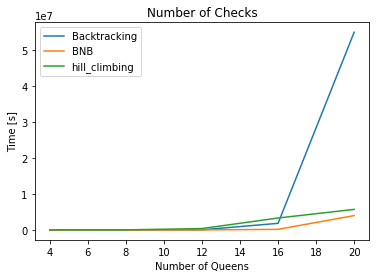

In [7]:



# execution time plot
plt.plot(queens_test_range, backtracking_execution_times)
plt.plot(queens_test_range, bnb_execution_times)
plt.plot(queens_test_range, hill_climbing_execution_times)
plt.title("Execution times")
plt.xlabel("Number of Queens")
plt.ylabel("Time [s]")
plt.legend(['Backtracking', "BNB", "hill climbing"], loc='upper left')
plt.savefig('execution_times.png')
plt.clf()

# number of checks plot
plt.plot(queens_test_range, backtracking_num_checks)
plt.plot(queens_test_range, bnb_num_checks)
plt.plot(queens_test_range, hill_climbing_num_checks)
plt.title("Number of Checks")
plt.xlabel("Number of Queens")
plt.ylabel("Time [s]")
plt.legend(['Backtracking', "BNB", "hill_climbing"], loc='upper left')
plt.savefig('number_checks.png')


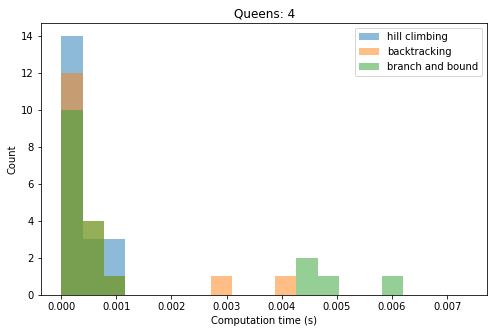

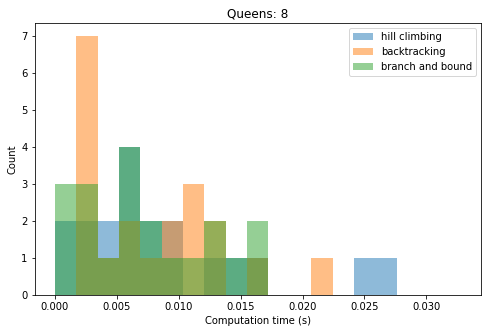

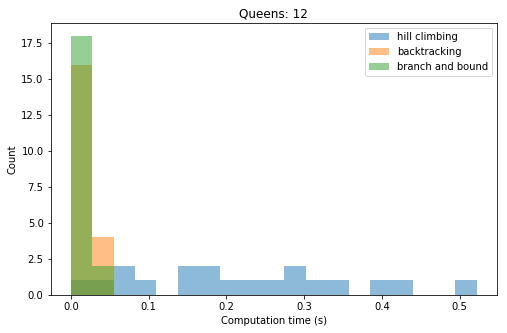

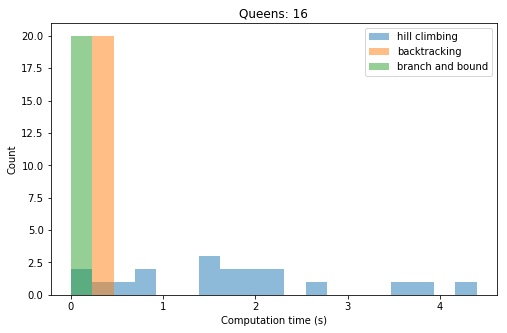

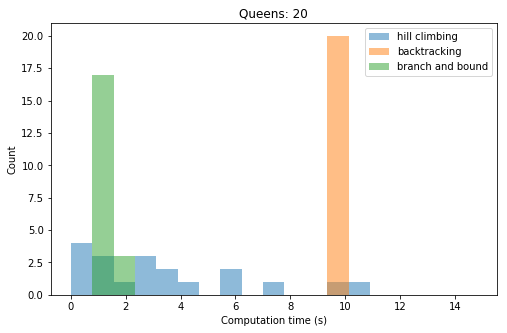

In [37]:
rcParams["figure.figsize"] = (8, 5)
for key in hc_temp_times.keys():
    ma = max([max(hc_temp_times[key]), max(backtracking_temp_times[key]),
             max(bnb_temp_times[key])])
    mi = 0
    bins = np.arange(mi, ma, (ma-mi)/20)
    plt.hist(hc_temp_times[key], bins=bins, label="hill climbing", alpha=0.5)
    plt.hist(backtracking_temp_times[key], bins=bins, label="backtracking", alpha=0.5)
    plt.hist(bnb_temp_times[key], bins=bins, alpha=0.5, label="branch and bound")
    plt.ylabel("Count")
    plt.xlabel("Computation time (s)")
    plt.title("Queens: "+str(key))
    plt.legend()
    plt.savefig("Histogram_"+str(key)+"_queens")
    plt.show()

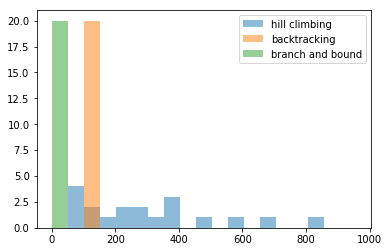

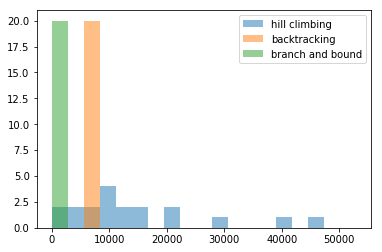

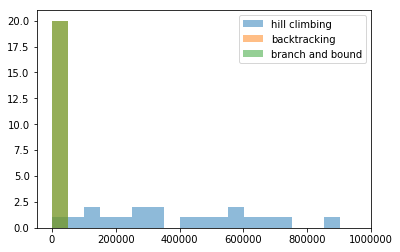

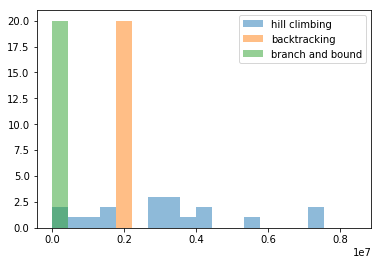

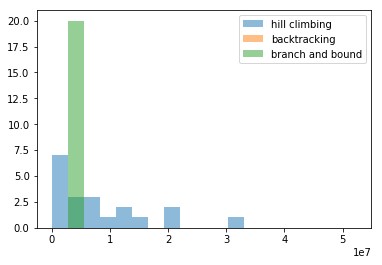

In [27]:
for key in hc_temp_checks.keys():
    ma = max([max(hc_temp_checks[key]), max(backtracking_temp_checks[key]),
             max(bnb_temp_checks[key])])
    mi = 0
    bins = np.arange(mi, ma, (ma-mi)/20)
    plt.hist(hc_temp_checks[key], bins=bins, label="hill climbing", alpha=0.5)
    plt.hist(backtracking_temp_checks[key], bins=bins, label="backtracking", alpha=0.5)
    plt.hist(bnb_temp_checks[key], bins=bins, alpha=0.5, label="branch and bound")
    plt.legend()
    plt.show()

In [15]:
bnb_df = pd.DataFrame(bnb_temp_checks)
bt_df = pd.DataFrame(backtracking_temp_checks)
hc_df = pd.DataFrame(hc_temp_checks)


In [24]:
meta_bnb_df = pd.DataFrame(columns=["mean", "sd"])
for index, row in bnb_df.iterrows():
    entry = {
        "mean": int(np.mean(row)),
        "sd": int(np.std(row)
    }
    meta_bnb_df = meta_bnb_df.append(entry, ignore_index=True)

In [25]:
meta_bnb_df

,mean,sd
0,831438.0,1.581741e+06
1,831438.0,1.581741e+06
2,831438.0,1.581741e+06
3,831438.0,1.581741e+06
4,831438.0,1.581741e+06
5,831438.0,1.581741e+06
6,831438.0,1.581741e+06
7,831438.0,1.581741e+06
8,831438.0,1.581741e+06
9,831438.0,1.581741e+06


In [18]:
bnb_df.merge(bt_df, suffixes = ["_bnb", "_bt"], left_index=True, right_index=True)

,4_bnb,8_bnb,12_bnb,16_bnb,20_bnb,4_bt,8_bt,12_bt,16_bt,20_bt
0,26,876,3066,160712,3992510,112,5876,27724,1835643,55076021
1,26,876,3066,160712,3992510,112,5876,27724,1835643,55076021
2,26,876,3066,160712,3992510,112,5876,27724,1835643,55076021
3,26,876,3066,160712,3992510,112,5876,27724,1835643,55076021
4,26,876,3066,160712,3992510,112,5876,27724,1835643,55076021
5,26,876,3066,160712,3992510,112,5876,27724,1835643,55076021
6,26,876,3066,160712,3992510,112,5876,27724,1835643,55076021
7,26,876,3066,160712,3992510,112,5876,27724,1835643,55076021
8,26,876,3066,160712,3992510,112,5876,27724,1835643,55076021
9,26,876,3066,160712,3992510,112,5876,27724,1835643,55076021
